## Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir=r"C:\Users\ahmet\Projelerle Yapay Zeka ve Bilgisayarlı Görü\02 - Tensorflow ile Derin Öğrenme\f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(500, 500), subset="training", batch_size=2)

test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(500, 500), subset="validation", batch_size=2)

Found 243 images belonging to 4 classes.
Found 27 images belonging to 4 classes.


In [2]:
train_datagen

## Verileri Görselleştirme

(2, 500, 500, 3)
[0. 0. 0. 1.]


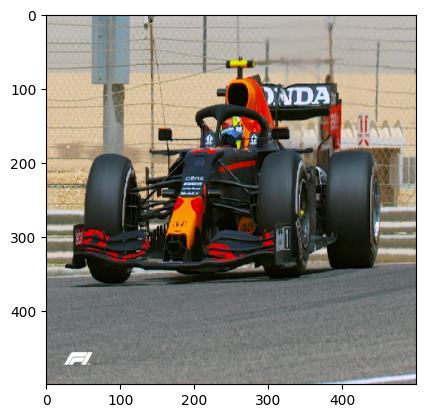

(2, 500, 500, 3)
[0. 0. 1. 0.]


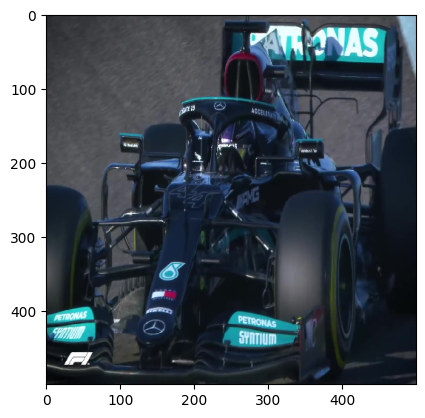

(2, 500, 500, 3)
[0. 1. 0. 0.]


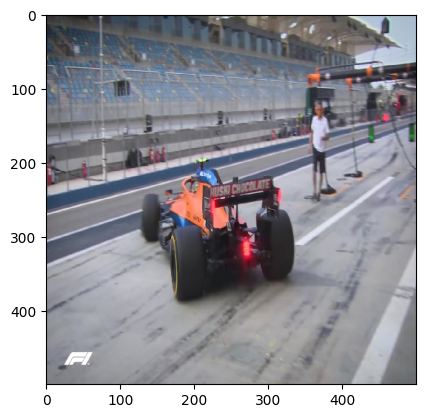

(2, 500, 500, 3)
[0. 0. 1. 0.]


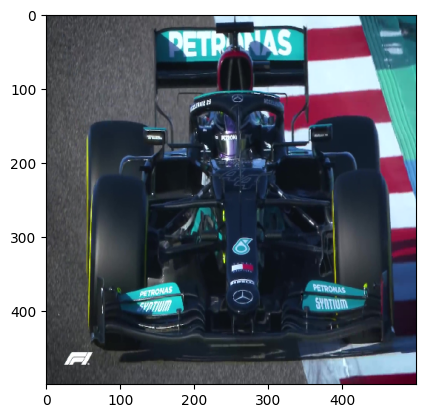

(2, 500, 500, 3)
[0. 1. 0. 0.]


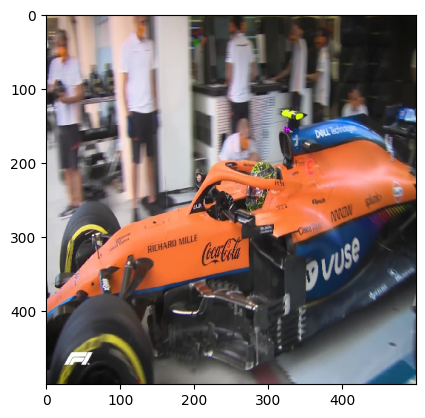

In [3]:
import matplotlib.pyplot as plt

for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

## Kütüphaneler

In [4]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers, activations

### Functional Model için Kütüphaneler

In [6]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

## Model Oluşumu

In [20]:
input_ = Input(shape=(500, 500, 3))

conv11 = Conv2D(filters=4, kernel_size=(2,2), activation="elu")(input_)
max11 = MaxPooling2D((2,2))(conv11)
conv12 = Conv2D(filters=8, kernel_size=(2,2), activation="elu")(max11)
max12 = MaxPooling2D((2,2))(conv12)
flat1 = Flatten()(max12)

conv21 = Conv2D(filters=4, kernel_size=(3,3), activation="elu")(input_)
max21 = MaxPooling2D((2,2))(conv21)
conv22 = Conv2D(filters=8, kernel_size=(2,2), activation="elu")(max21)
max22 = MaxPooling2D((2,2))(conv22)
flat2 = Flatten()(max22)

merge = concatenate([flat1, flat2])

fc1 = Dense(50, activation="elu")(merge)
fc2 = Dense(100, activation="elu")(fc1)
fc3 = Dense(100, activation="elu")(fc2)
fc4 = Dense(50, activation="elu")(fc3)
out = Dense(4, activation="softmax")(fc4)

model = Model(inputs=input_, outputs=out)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 499, 499, 4)  52          ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 498, 498, 4)  112         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 249, 249, 4)  0          ['conv2d_4[0][0]']         

## Model Eğitimi

In [22]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [23]:
model.compile(optimizer=optimizer, loss=loss, metrics=["mse", "accuracy"])

In [24]:
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen)

Epoch 1/5
122/122 [==============================] - 39s 306ms/step - loss: 3.7625 - mse: 0.1957 - accuracy: 0.4733 - val_loss: 1.5783 - val_mse: 0.2002 - val_accuracy: 0.3333
Epoch 2/5
122/122 [==============================] - 38s 310ms/step - loss: 0.6944 - mse: 0.0985 - accuracy: 0.7160 - val_loss: 1.5771 - val_mse: 0.1949 - val_accuracy: 0.4074
Epoch 3/5
122/122 [==============================] - 41s 339ms/step - loss: 0.3749 - mse: 0.0529 - accuracy: 0.8519 - val_loss: 1.4501 - val_mse: 0.1706 - val_accuracy: 0.5185
Epoch 4/5
122/122 [==============================] - 44s 359ms/step - loss: 0.2858 - mse: 0.0378 - accuracy: 0.9053 - val_loss: 1.4632 - val_mse: 0.1992 - val_accuracy: 0.5185
Epoch 5/5
122/122 [==============================] - 39s 317ms/step - loss: 0.1387 - mse: 0.0169 - accuracy: 0.9547 - val_loss: 1.8911 - val_mse: 0.1915 - val_accuracy: 0.5185


In [25]:
result.history

{'loss': [3.7624917030334473,
  0.694400429725647,
  0.3749445080757141,
  0.28576380014419556,
  0.13869567215442657],
 'mse': [0.19573047757148743,
  0.09848728030920029,
  0.0529380664229393,
  0.03778522089123726,
  0.016913190484046936],
 'accuracy': [0.47325101494789124,
  0.7160493731498718,
  0.8518518805503845,
  0.9053497910499573,
  0.9547325372695923],
 'val_loss': [1.578277349472046,
  1.5770964622497559,
  1.450127124786377,
  1.4632281064987183,
  1.8911073207855225],
 'val_mse': [0.20015662908554077,
  0.1948973685503006,
  0.17057721316814423,
  0.19918613135814667,
  0.19148461520671844],
 'val_accuracy': [0.3333333432674408,
  0.40740740299224854,
  0.5185185074806213,
  0.5185185074806213,
  0.5185185074806213]}

## Eğitim Görselleştirme

In [26]:
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
acc_loss = result.history["loss"]
val_loss = result.history["val_loss"]

In [27]:
epoch = range(1, len(acc)+1)

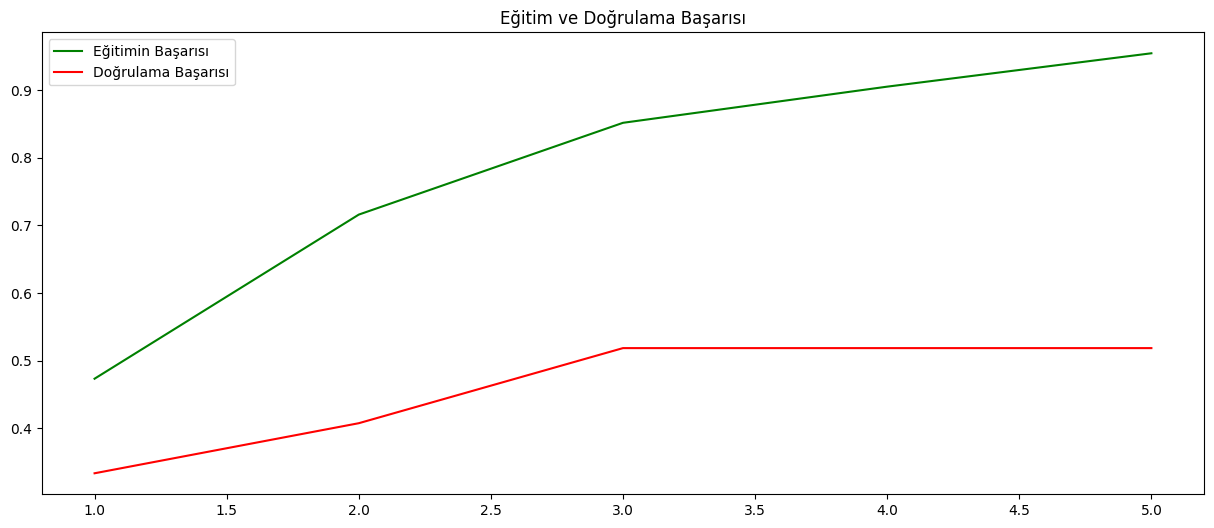

In [28]:
plt.figure(figsize = (15, 6))
plt.plot(epoch, acc, label=("Eğitimin Başarısı"), color="g")
plt.plot(epoch, val_acc, label=("Doğrulama Başarısı"), color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

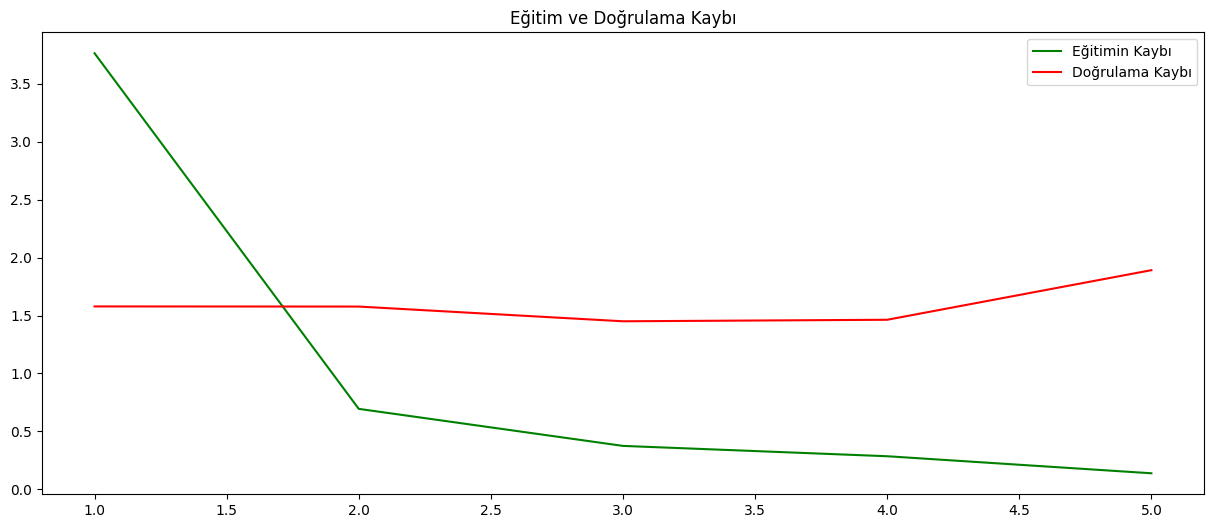

In [29]:
plt.figure(figsize = (15, 6))
plt.plot(epoch, acc_loss, label=("Eğitimin Kaybı"), color="g")
plt.plot(epoch, val_loss, label=("Doğrulama Kaybı"), color="r")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()

In [30]:
model.evaluate(test_datagen)

14/14 [==============================] - 1s 56ms/step - loss: 1.8911 - mse: 0.1915 - accuracy: 0.5185


[1.8911094665527344, 0.1914847046136856, 0.5185185074806213]

In [31]:
model.evaluate(train_datagen)

122/122 [==============================] - 7s 57ms/step - loss: 0.3350 - mse: 0.0462 - accuracy: 0.8642


[0.33498018980026245, 0.0462157316505909, 0.8641975522041321]